# Лабораторна робота 2
# Мета: Вивчення основних функцій Pandas для аналізу даних.

In [3]:
print('My variant:', (26 + 4) % 5 + 1)

My variant: 1


# Номери вправ
1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26

In [4]:
#1 Виведіть перші 8 рядків набору даних.
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [5]:
#2 Вивести останні 8 рядків набору даних.
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [6]:
#3 Отримайте імена стовпців набору даних
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
pd.DataFrame({'Column name: ': df.columns, 'Data type: ': df.dtypes})

,Column name:,Data type:
Id,Id,int64
Name,Name,object
Year,Year,int64
Gender,Gender,object
Count,Count,int64


In [7]:
#5 Знайдіть кількість унікальних імен у наборі даних
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df['Name'].nunique()

93889

In [8]:
#10 Підрахуйте кількість унікальних імен у кожному році
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.groupby('Year')['Name'].nunique()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [9]:
#11 Знайдіть рік із найбільшою кількістю унікальних імен.
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.groupby('Year')['Name'].nunique().idxmax()

2008

In [10]:
#12 Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
count = df.loc[df['Year'] == 2008, 'Count'].max()
df.loc[df['Count'] == count, 'Name'].values[0]

'Jacob'

In [11]:
#13 Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
count = df.loc[
    (df['Gender'] == 'F') &
    (df['Name'] == 'Jacob'),
    'Count'
].max()
df.loc[
    (df['Gender'] == 'F') &
    (df['Name'] == 'Jacob') &
    (df['Count'] == count)
]

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [12]:
#14 Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
grouped = df.groupby('Name').sum().reset_index()
gender_neutral = df[df['Name'].isin(grouped[grouped['Gender'].str.contains('MF|FM', regex=True)]['Name'].values)]
year = gender_neutral.groupby(['Year'])['Name'].nunique().idxmax()
print(f"Year: {year}; gender neutral names: {gender_neutral[gender_neutral['Year'] == year]['Name'].nunique()}")

Year: 2009; gender neutral names: 7372


In [13]:
#15 Знайдіть загальну кількість народжень за рік.
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.groupby('Year')['Count'].sum().head(5)

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64

In [14]:
#16 Знайдіть рік, коли народилося найбільше дітей
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.groupby('Year')['Count'].sum().idxmax()

1957

In [15]:
#17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
genders_counts_df = df.groupby(['Year', 'Gender'])['Count'].sum().reset_index()
genders_counts_df.pivot(index = 'Year', columns = 'Gender', values = 'Count').head(5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [16]:
#18 Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
genders_counts_df = df.groupby(['Year', 'Gender'])['Count'].sum().reset_index()
genders_counts_df = genders_counts_df.pivot(index = 'Year', columns = 'Gender', values = 'Count')
genders_counts_df.loc[genders_counts_df['F'] > genders_counts_df['M']].size

108

In [17]:
#21 Порахуйте, скільки разів хлопчиків називали Barbara
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
df.loc[
    (df['Name'] == 'Barbara') &
    (df['Gender'] == 'M'),
    'Count'
].sum()

4139

In [18]:
#22 Підрахуйте скільки років проводилось спостереження
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
result = df['Year'].max() - df['Year'].min() + 1
print(f'Спостереження проводилось {result} років')

Спостереження проводилось 135 років


In [20]:
# 24 Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )
import pandas as pd

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
unpopular_names = df[df['Count'] == df['Count'].min()]
unpopular_names_mode = unpopular_names['Name'].mode()[0]
total_count = unpopular_names[unpopular_names['Name'] == unpopular_names_mode]['Count'].sum()
print(f"Найпорулярніше серед непопулярних імен - це {unpopular_names_mode}. Ним назвали {total_count}")

Найпорулярніше серед непопулярних імен - це Celester. Ним назвали 160


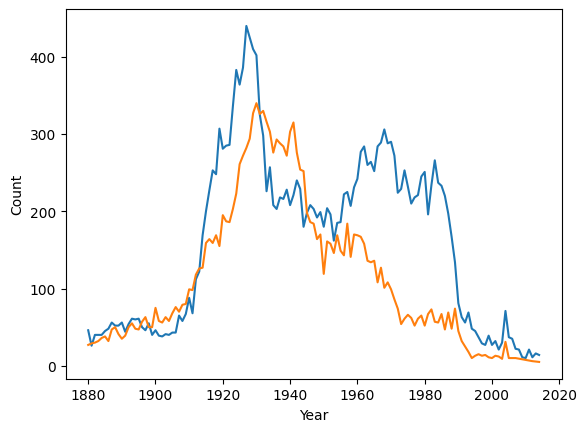

In [21]:
#26 Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.
import pandas as pd
import matplotlib.pyplot as pyplot

csv_path = 'csv/NationalNames.csv'
df = pd.read_csv(csv_path)
pyplot.xlabel('Year')
pyplot.ylabel('Count')
john_df = df.loc[
    (df['Name'] == 'John') &
    (df['Gender'] == 'F')]
mary_df = df.loc[
    (df['Name'] == 'Mary') &
    (df['Gender'] == 'M')]
pyplot.plot(john_df['Year'], john_df['Count'])
pyplot.plot(mary_df['Year'], mary_df['Count'])